In [4]:
# load the data extracted earlier
data = pd.read_csv('./barnhart_comps.csv')

In [5]:
data.head()

,elev,idx,lat,lon,meanpeakSWE
0,2296,76923,35.53125,-107.90625,16.913863
1,2312,76924,35.53125,-107.96875,17.873181
2,2174,77647,35.59375,-107.84375,10.739371
3,2208,77648,35.59375,-107.90625,11.838238
4,2211,77649,35.59375,-107.96875,12.396494


In [6]:
minelev = data.elev.min()
maxelev = data.elev.max()

In [7]:
minelev

1140.0

In [8]:
maxelev

3821.0

In [9]:
# reset these values to generate the bins
minelev = 1150
maxelev = 3850 # use 50 m on either side of these values

In [10]:
bins = np.arange(minelev,maxelev,100) #generate bins

In [11]:
bins

array([1150, 1250, 1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150,
       2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050, 3150, 3250,
       3350, 3450, 3550, 3650, 3750])

In [15]:
delev = 50
area = []
swe = []
for bin in bins:
    # compute bin edges
    mielev = bin-delev
    maelev = bin+delev
    
    #subset data
    data2 = data.loc[(data.elev>mielev)&(data.elev<=maelev)]
    
    area2 = float(len(data2)) # get number of cells
    tot_swe = data2.meanpeakSWE.sum() #sum SWE in elevation band
    
    #save data
    area.append(area2)
    swe.append(tot_swe)

In [18]:
out = pd.DataFrame({'bin':bins,'area':area,'swe':swe})

In [22]:
out['cum_area'] = out.area.cumsum()*(6.*6.) # convert cells to area and take the cumulative sum

In [24]:
out['cum_swe'] = out.swe.cumsum() # cumulative sum of SWE

In [55]:
maxSWE = out.cum_swe.max()

In [61]:
out['percent_swe'] = out['swe']/maxSWE*100
out['cum_perc_swe'] = out.percent_swe.cumsum() # generate percents and cumulative percents of SWE

In [64]:
out.loc[out.swe == 70286.699277774009] # Q1.1.3

,area,bin,swe,cum_area,cum_swe,percent_swe,cum_perc_swe
19,193,3050,70286.699278,284040,579094.206908,7.927505,65.314949


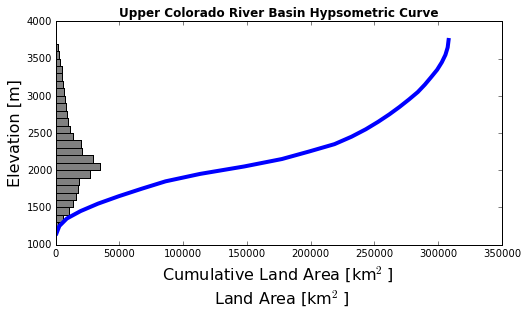

In [65]:
fz = 16
plt.figure(figsize=(8,4))
plt.plot(out.cum_area,out.bin, lw=4)
plt.barh(out.bin-50, out.area*36., height=100,facecolor='0.5')
plt.xlabel('Cumulative Land Area [km$^2$] \n Land Area [km$^2$]', fontsize = fz)
plt.ylabel('Elevation [m]', fontsize = fz)
plt.title('Upper Colorado River Basin Hypsometric Curve', fontsize = fz-4, fontweight = 'bold')
plt.savefig('./ucr_hypso.png', dpi = 300, bbox_inches = 'tight')

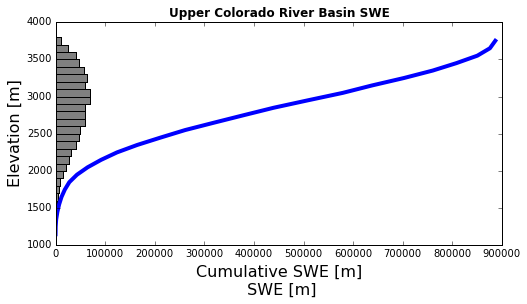

In [66]:
fz = 16
plt.figure(figsize=(8,4))
plt.plot(out.cum_swe,out.bin, lw=4)
plt.barh(out.bin-50, out.swe, height=100,facecolor='0.5')
plt.xlabel('Cumulative SWE [m] \n SWE [m]', fontsize = fz)
plt.ylabel('Elevation [m]', fontsize = fz)
plt.title('Upper Colorado River Basin SWE', fontsize = fz-4, fontweight = 'bold')
plt.savefig('./ucr_swe.png', dpi = 300, bbox_inches = 'tight')

In [67]:
out

,area,bin,swe,cum_area,cum_swe,percent_swe,cum_perc_swe
0,21,1150,58.600779,756,58.600779,0.006609,0.006609
1,63,1250,259.710246,3024,318.311025,0.029292,0.035902
2,162,1350,1024.901022,8856,1343.212048,0.115597,0.151498
3,299,1450,2415.575149,19620,3758.787197,0.272448,0.423947
4,380,1550,3482.620011,33300,7241.407208,0.392798,0.816745
5,453,1650,4771.008438,49608,12012.415646,0.538113,1.354858
6,496,1750,6730.486044,67464,18742.901690,0.759119,2.113977
7,522,1850,9110.292617,86256,27853.194308,1.027533,3.141510
8,753,1950,15358.186843,113364,43211.381151,1.732221,4.873731
9,961,2050,21533.706805,147960,64745.087956,2.428746,7.302477
